## Assignment

- Task - 1 Write a function that takes OfferDetails as input, and returns FaceValue as output
- Task - 2 Write a function that takes OfferDetails as input, and returns Product as output (Product can be single or array)

### Task - 1

- We have to extract FaceValue from the offerdetails. FaceValue is the savings on the offer , generally a number

In [12]:
import pandas as pd
import re

In [13]:
data = pd.read_csv('/content/drive/My Drive/SKS/coupons_ner.csv', header=None)

In [14]:
data.shape

(886, 1)

- Below represents sample coupon data for a retailer. 

In [ ]:
data

,0
0,Save $2.00 ONE Downy Liquid Fabric Conditioner...
1,Save $2.00 ONE Tide PODS OR Tide Power PODS (e...
2,Save $2.00 ONE Tide Laundry Detergent (exclude...
3,SAVE $1.00 ON TWO when you buy TWO BOXES (8.9 ...
4,$3.00 OFF when you purchase any THREE (3) Pepp...
5,SAVE $1.11 when you buy any ONE (1) Familly Si...
6,SAVE $1.00 ON TWO when you buy TWO PACKAGES an...
7,Save $1.00 on any TWO (2) Sargento® Natural Ch...
8,$0.65 OFF On Any ONE (1) Oikos Greek Yogurt Cu...
9,$2.00 OFF ONE (1) SMALL bag of Eight O'Clock® ...


In [ ]:
# Some includes SAVE or Save
# Includes $ and ¢
# Includes OFF
pattern = r'^(?:(?:Save|SAVE) )?(\$?(?:\d+)(?:\.\d+)?¢?)(?: OFF)?'

In [ ]:
def fun1(data):
    '''Function to extract FaceValue'''
    FaceValue = []
    for _, item in data[0].iteritems():
        FaceValue.append(re.findall(pattern, item)) #find the pattern
    return FaceValue

In [ ]:
# For each offerdetails we extract FAceValue
FaceValue = fun1(data)

In [ ]:
# Find the offerdetails which don't include FaceValue as describes by the above pattern
empty_index = []
for i, ele in enumerate(FaceValue):
    if not ele:
        empty_index.append(i)

In [ ]:
len(empty_index)

308

- Total 308 product details are without facevalue.

In [ ]:
data[0].iloc[270:300]

270    Osteo Bi-Flex® on any ONE (1) Osteo Bi-Flex® p...
271        CLIF BAR® on any ONE (1) CLIF® Bar Multipack.
272    BENADRYL® on Any ONE (1) BENADRYL® 20ct, 24ct ...
273    Claritin® off any ONE (1) Claritin® Cool Mint ...
274    Claritin-D® off any ONE (1) Claritin-D® 15ct o...
275    Claritin® off any ONE (1) Children's Claritin®...
276    Claritin® off any ONE (1) Children's Claritin®...
277     Ensure® on Any TWO (2) Ensure Multi-Pack Shakes.
278    Aleve® on any ONE (1) Aleve® or Aleve®PM produ...
279    Adult ZYRTEC® when you buy ONE (1) Adult ZYRTE...
280          Florastor on any ONE (1) Florastor product.
281    Allegra® on ONE (1) Allegra® Allergy 24ct or l...
282                            Dixie Tableware 40-94-ct.
283    Kingsford Match Light or Charcoal... 12-16-lb....
284    Pabst Blue Ribbon on ONE (1) Pabst Blue Ribbon...
285    Tide ONE Tide Laundry Detergent 37 oz TO 50 oz...
286    Tide ONE Tide PODS 16 ct OR 12 ct (excludes Ti...
287    Chinet® Cut Crystal® Buy

- Above are some offerdetails which dont include FAceValue

### Task - 2

- In this task we have to extract product names from offer details.
- Product - Can be a single value or an array.

#### NER model

- For this task we have to build product corpus manually and from that we have to build NER model which recognizes product as P(Product) and remaining words as O (Other).
- We first extract all words from offerdetails.
- We will find unique words to label.
- Manually we will label the words (P/O) in a text file- words.txt.
- To label words we assume some notations like, ®, ™ which are mostlly in product names.
- Some word along with numbers like 8-9.87-oz, 5.7-6.50 , lb, liter, gallon which are not in product names.
- Some brand names like huggies, Hershey's, Tide, Pulsar, etc
- After manual labelling we will use many-to-many LSTM based architecture in which offerdeatails is input and tags for each word is output.
- We will use Adam optimizer, sparse_categorical_cross_entropy as loss function.


- Find Unique words from offer details.

In [3]:
tf.__version__

'2.3.0'

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM, GRU, Dense, Input, Embedding, Bidirectional
from tensorflow.keras.models import Model

In [15]:
words = []
for _, ele in data[0].iteritems():
    for word in ele.split(' '):
        words.append(word.lower())

In [16]:
len(words)

15747

In [17]:
unique_words = list(set(words))

In [18]:
len(unique_words)

2351

In [ ]:
# Write words in to text file
with open('words.txt', 'w') as f:
    for item in unique_words:
        f.write("%s\n" % item)

In [21]:
# Get words and tags from word.text
u_words = []
u_tags = []
with open('/content/drive/My Drive/SKS/words.txt','r') as f:
    for line in f:
        lst = line.split(' ')
        u_words.append(line.split(' ')[0])
        u_tags.append(line.split(' ')[1])

In [22]:
unique_tagss = list(set(u_tags))

In [23]:
len(u_tags)

2350

In [24]:
len(u_words)

2350

In [25]:
# make a dictionary for word and associated tags
word_tag_dictionary = dict(zip(u_words, u_tags))

In [ ]:
word_tag_dictionary

In [27]:
# tags and number dictionary
# Her P is for product, O/o is for Other and '' for ''
tags = ['', 'P\n', 'O\n', 'o\n']
tag_nums = [0, 1, 2, 3]
tags_to_numbers = dict(zip(tags, tag_nums))
numbers_to_tags = dict(zip(tag_nums, tags))

In [28]:
word_to_numbers = {w: i for i, w in enumerate(unique_words)}

In [29]:
# Create output Y for tags associated with words in input offerdetails
data_y = []
for row in data[0]:
    label = []
    for ele in row.split(' '):
        if ele.lower() in word_tag_dictionary:
            label.append(tags_to_numbers[word_tag_dictionary[ele.lower()]])
    data_y.append(label)

In [30]:
# Create input X for numbers associated with words in offerdetails
data_x = []
for row in data[0]:
    label = []
    for ele in row.split(' '):
        if ele.lower() in  word_to_numbers and ele.lower() != '':
            label.append(word_to_numbers[ele.lower()])
    data_x.append(label)

In [31]:
# FInd max len from all input
length_x = [len(ele) for ele in data_x]
maxlen = max(length_x)  

In [32]:
# Pad X and Y with maxlen
X = pad_sequences(maxlen=maxlen, sequences=data_x, padding="post")
y = pad_sequences(maxlen=maxlen, sequences=data_y, padding="post")

- Split Train and TEst data using train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(708, 77) (178, 77) (708, 77) (178, 77)


In [35]:
word_len = len(u_words) 
embedding_dim = 64
dense_units = 4
batch_size = 32

In [53]:
def get_model():
    
    tf.keras.backend.clear_session()
    input_layer = Input(shape=(maxlen,), name="input_layer")
    
    x_embedd = Embedding(input_dim=2351, output_dim=embedding_dim, input_length=maxlen, 
                    mask_zero=True, 
                    embeddings_initializer=tf.keras.initializers.RandomNormal(mean=0, stddev=1, seed=23),
                     name="Embedding_layer")(input_layer)
    
    x_bilstm = Bidirectional(LSTM(units=64, activation='tanh', return_sequences=True, recurrent_activation='sigmoid', use_bias=True, 
                 kernel_initializer=tf.keras.initializers.glorot_uniform(seed=26),
                 recurrent_initializer=tf.keras.initializers.orthogonal(seed=54),
                 bias_initializer=tf.keras.initializers.zeros(), name="BiLSTM_layer"))(x_embedd)
    
    x_lstm = LSTM(units=64, activation='tanh', return_sequences=True, recurrent_activation='sigmoid', use_bias=True, 
                 kernel_initializer=tf.keras.initializers.glorot_uniform(seed=26),
                 recurrent_initializer=tf.keras.initializers.orthogonal(seed=54),
                 bias_initializer=tf.keras.initializers.zeros(), name="LSTM_layer")(x_bilstm)
    
    x_out = Dense(dense_units, activation=None, kernel_initializer=tf.keras.initializers.glorot_uniform(seed=45),
                  name="output_layer")(x_lstm)
    
    basic_lstm_model = Model(inputs=input_layer, outputs=x_out, name="basic_lstm_model")
    
    return basic_lstm_model


In [54]:
model = get_model()
model.summary()

Model: "basic_lstm_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 77)]              0         
_________________________________________________________________
Embedding_layer (Embedding)  (None, 77, 64)            150464    
_________________________________________________________________
bidirectional (Bidirectional (None, 77, 128)           66048     
_________________________________________________________________
LSTM_layer (LSTM)            (None, 77, 64)            49408     
_________________________________________________________________
output_layer (Dense)         (None, 77, 4)             260       
Total params: 266,180
Trainable params: 266,180
Non-trainable params: 0
_________________________________________________________________


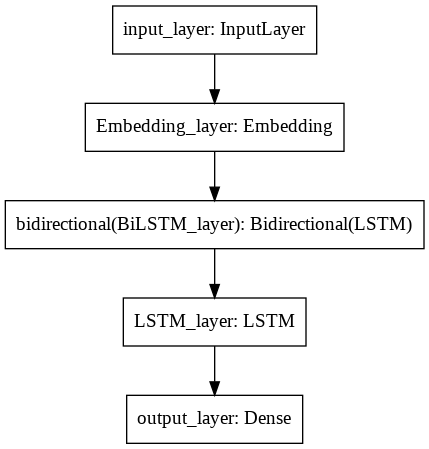

In [55]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

In [56]:
# Define optimizer
def optimizer():
    return tf.keras.optimizers.Adam()
  
# Define Loss function
def loss(labels, logits):
  loss_ = tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)
  return loss_

In [57]:
model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

In [58]:
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
23/23 [==============================] - 8s 339ms/step - loss: 0.2100 - accuracy: 0.6755 - val_loss: 0.1456 - val_accuracy: 0.6956
Epoch 2/20
23/23 [==============================] - 4s 174ms/step - loss: 0.1355 - accuracy: 0.7088 - val_loss: 0.1257 - val_accuracy: 0.7074
Epoch 3/20
23/23 [==============================] - 4s 175ms/step - loss: 0.1136 - accuracy: 0.7560 - val_loss: 0.1041 - val_accuracy: 0.7815
Epoch 4/20
23/23 [==============================] - 4s 183ms/step - loss: 0.0914 - accuracy: 0.8163 - val_loss: 0.0879 - val_accuracy: 0.8158
Epoch 5/20
23/23 [==============================] - 4s 184ms/step - loss: 0.0743 - accuracy: 0.8535 - val_loss: 0.0737 - val_accuracy: 0.8572
Epoch 6/20
23/23 [==============================] - 4s 183ms/step - loss: 0.0597 - accuracy: 0.8919 - val_loss: 0.0623 - val_accuracy: 0.8877
Epoch 7/20
23/23 [==============================] - 4s 185ms/step - loss: 0.0479 - accuracy: 0.9191 - val_loss: 0.0546 - val_accuracy: 0.9024
Epoch 

### Loss and Accuracy Plots

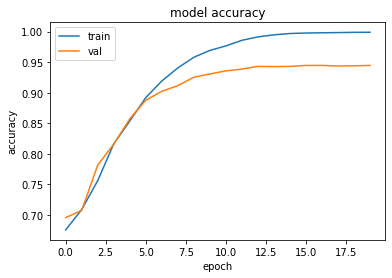

In [63]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

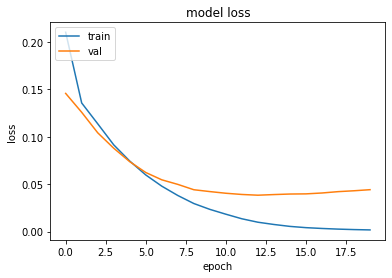

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### Summary

- From the above plots we can see that we got around 94% val accuracy. 
- The main challenge here is to manually label data.
- I have also tried Spacy and StanfordNERtagger, but they are not much accurate.
- By building architecture from scratch we can train with our custom datasets.
- For inference part, we can do the following steps:
- 1. tokenize our query point(Offerdetails)
- 2. Convert tokens to lower and then transform into numbers using word_to_numbers dictionary.
- 3. Use the model for predict the labels.
- 4. USe argmax() and convert numbers into tags.
